# Study of ads for the sale of apartments

***We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Our task is to set the parameters. This will make it possible to build an automated system: it will track anomalies and fraudulent activity.***

**Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the city center, airport, nearest park and body of water.**

- Studying the time of sale of the apartment.
- Exclusion of rare and outliers
- Factors most affecting the cost of an apartment?
- For apartments in St. Petersburg, which area is included in the center
- A segment of apartments in the center. Do the following parameters affect the price: area, price, number of rooms, ceiling height.


### Step 1. Open the data file and examine the general information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
import operator
def sum_of_strings(list_of_strings):
    return reduce(operator.add, list_of_strings)

### Conclusion

In [4]:
n = (data.groupby(by=['floor']).sum())
n

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
floor,,,,,,,,,,,,,,,,,,
1,26981,1.401199e+10,164244.70,6260,4941.85,20047.0,89216.070000,15,4,23763.62,704.0,56370600.0,31365072.0,1400.0,455825.0,1572.0,514568.0,497931.0
2,33265,2.075375e+10,206084.68,7414,6095.72,25165.0,111564.360004,17,8,30753.58,1533.0,67369836.0,33369943.0,1768.0,580057.0,2038.0,625268.0,537393.0
3,30066,2.068689e+10,193495.87,6733,5417.20,24551.0,105396.400001,8,5,29442.31,1646.0,64869902.0,31867943.0,1655.0,534604.0,1959.0,621545.0,478117.0
4,27655,2.001009e+10,179839.00,6292,5021.54,22336.0,98206.849999,9,4,26859.25,1530.0,59804260.0,29169731.0,1538.0,515224.0,1844.0,567099.0,445353.0
5,25278,1.734327e+10,160170.01,5696,4676.30,21801.0,86542.670000,9,4,24148.14,1515.0,54674219.0,27020796.0,1355.0,459944.0,1542.0,510687.0,412532.0
6,12996,9.848874e+09,82031.52,2696,2161.51,15043.0,42061.680002,12,5,13160.78,928.0,30910579.0,14792053.0,640.0,245379.0,822.0,286139.0,199507.0
7,12567,9.633244e+09,75420.30,2423,2074.26,14923.0,38658.750003,13,3,12095.90,896.0,29030422.0,14085974.0,534.0,208356.0,694.0,256345.0,187001.0
8,11115,7.390697e+09,62845.53,2128,1744.59,13620.0,32380.781499,6,4,10203.58,843.0,27800415.0,13532160.0,483.0,198406.0,637.0,241528.0,164283.0
9,10520,6.631814e+09,59046.03,2019,1675.75,13622.0,30420.250002,5,6,9964.47,797.0,26271606.0,12857125.0,402.0,173559.0,598.0,229000.0,152723.0


- Empty values in living_area, ceiling_height, living_area, is_apartment,balcony, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000,ponds_nearest, days_exposition
- Wrong data type in almost all columns
 
 

### Step 2. Data preprocessing

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S') # Change value type to datetime64
# Replace all NaN values with 0
data['balcony'] = data['balcony'].fillna(value = 0)
data['days_exposition'] = data['days_exposition'].fillna(value = 0)
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0)

ceiling_height_avg = data['ceiling_height'].median() # Median
living_area_avg = data['living_area'].median() # Median
kitchen_area_avg = data['kitchen_area'].median() # Median
data['ceiling_height'] = data['ceiling_height'].fillna(value = ceiling_height_avg) # replace missing values ​​with ceiling_height_avg
data['living_area'] = data['living_area'].fillna(value = living_area_avg) # replace missing values ​​with living_area_avg
data['kitchen_area'] = data['kitchen_area'].fillna(value = kitchen_area_avg) # replace missing values ​​with kitchen_area_avg
data = data.drop_duplicates().reset_index(drop=True) # Remove duplicates
data = data.dropna()
data['is_apartment'] = data['is_apartment'].astype('bool') # replace value type with bool

# Replacing the value type with Int
data['balcony'] = data['balcony'].astype('Int64')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('Int64')
data['airports_nearestl'] = data['airports_nearest'].astype('Int64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('int')


In [6]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  int64
airports_nearestl                Int64
dtype: object

### Step 3. Calculate and add to table

In [7]:
data['square_meter_price'] = (data['last_price'] // data['total_area']).astype('int') # Price per square meter
data['weekday'] = data['first_day_exposition'].dt.weekday # Day of the week
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # Year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # Month


"""
Returns the floor type given floor and floors_total using the rules:

- 'last' if floor == floors_total

- 'first' when floor == 1

- 'other' for other values
"""
def apartment_floor(row):

    floors_total = row['floors_total']
    floor = row['floor']

    if floor == floors_total:
        return 'last'
    
    if floor == 1:
        return 'first'

    return 'other'
data['apartment_floor'] = data. apply(apartment_floor, axis=1) # create a column with the received values
data['living_total'] = (data['living_area'] / data['total_area']) # ratio of living area to total area
data['kitchen_total'] = (data['kitchen_area'] / data['total_area']) # ratio of kitchen area to total
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,airports_nearestl,square_meter_price,weekday,year,month,apartment_floor,living_total,kitchen_total
29,9,8600000,100.0,2016-04-09,3,2.65,19,52.0,15,False,...,896,125,30394,86000,5,2016,4,other,0.520000,0.110000
41,16,7900000,74.0,2016-05-04,3,2.65,14,59.0,8,False,...,759,179,37715,106756,2,2016,5,other,0.797297,0.162162
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.9,2,False,...,907,987,35416,135970,2,2015,7,other,0.500000,0.108776
50,1,4500000,48.2,2017-11-13,1,2.70,5,25.4,4,False,...,330,152,19841,93360,0,2017,11,other,0.526971,0.186722
56,14,4350000,41.0,2016-03-28,1,2.80,7,18.1,4,False,...,439,152,13772,106097,0,2016,3,other,0.441463,0.270732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,6,4780000,42.5,2016-04-26,1,2.70,10,27.6,3,False,...,474,92,24281,112470,1,2016,4,other,0.649412,0.214118
23512,20,12000000,87.0,2019-04-28,3,2.65,10,58.0,5,False,...,628,0,29460,137931,6,2019,4,other,0.666667,0.126437
23563,18,5500000,51.0,2017-03-24,2,2.55,10,30.3,2,False,...,919,377,30305,107843,4,2017,3,other,0.594118,0.176471
23665,11,4250000,47.0,2016-05-20,1,2.65,6,18.2,1,False,...,519,131,20503,90425,4,2016,5,first,0.387234,0.310638


### Step 4. Conduct an exploratory data analysis and follow the instructions:

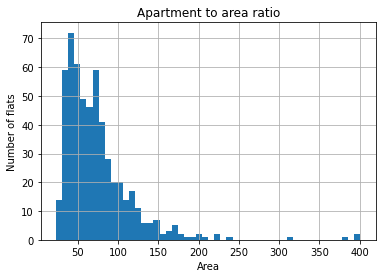

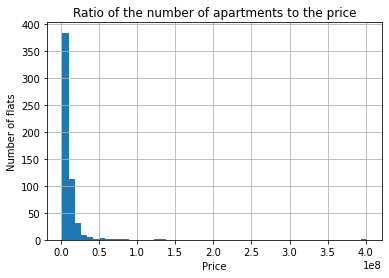

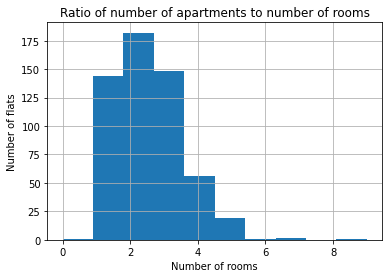

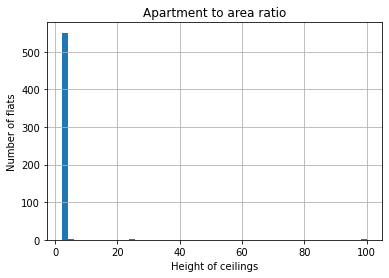

In [8]:
plt.xlabel('Area')
plt.ylabel('Number of flats')
plt.title('Apartment to area ratio')
data['total_area'].hist(bins=50) # Histogram Areas of apartments
plt.show()
plt.xlabel('Price')
plt.ylabel('Number of flats')
plt.title('Ratio of the number of apartments to the price')
data['last_price'].hist(bins=50) # Histogram of apartment prices
plt.show()
plt.xlabel('Number of rooms')
plt.ylabel('Number of flats')
plt.title('Ratio of number of apartments to number of rooms')
data['rooms'].hist(bins=10) # Histogram of rooms in apartments
plt.show()
plt.xlabel('Height of ceilings')
plt.ylabel('Number of flats')
plt.title('Apartment to area ratio')
data['ceiling_height'].hist(bins=50) # Ceiling height histogram
plt.show()

***The average area of apartments is about 50 meters The most frequent apartments have 2-3 rooms The average ceiling height is a little more than 2.5 meters There is a very large spread in the histogram with the price (There are very cheap real estate and very expensive) ***

132.0
227.21480144404333


0.25      45.0
0.50     132.0
0.75     335.5
1.00    1572.0
Name: days_exposition, dtype: float64

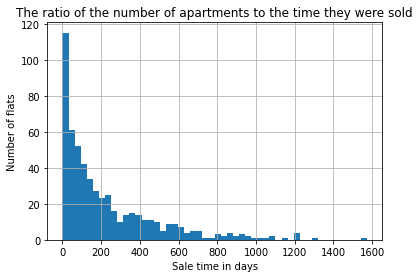

In [9]:
plt.xlabel('Sale time in days')
plt.ylabel('Number of flats')
plt.title('The ratio of the number of apartments to the time they were sold')
data['days_exposition'].hist(bins=50) # Histogram of apartment sales time
print(data['days_exposition'].median()) # Median 
print(data['days_exposition'].mean()) # Average
data['days_exposition'].quantile([0.25, 0.5, 0.75, 1]) #50% quantile == median

***There are very large outliers. more than 500 days, I think this is due to illiquid real estate or people constantly forget to remove ads from sites.
Most apartments are sold within 3 months.
It’s fast for a month, but for a long time it’s more than six months ***

0.25     52.1
0.50     70.0
0.75     91.7
1.00    197.2
Name: total_area, dtype: float64
401.0


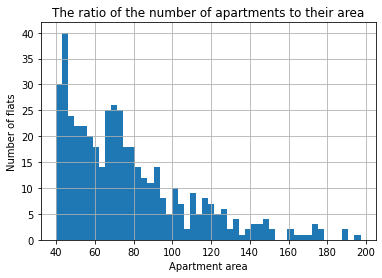

In [10]:
plt.xlabel('Apartment area')
plt.ylabel('Number of flats')
plt.title('The ratio of the number of apartments to their area')
good_data = data.query('40 <= total_area <= 200') # Remove too small and too large values
print(good_data['total_area'].quantile([0.25, 0.5, 0.75, 1])) #50% quantile == median
good_data['total_area'].hist(bins=50) # Build a gitogram
print(data['total_area'].max()) # Maximum value

***The average area of apartments is from 30 to 70 meters (There are also quite large apartments up to 900 meters)***

200 is the number after which there are large outliers. I calculated it using the 75% quantile.

0.25     5650000.0
0.50     7700000.0
0.75    11564288.0
1.00    30000000.0
Name: last_price, dtype: float64
401300000


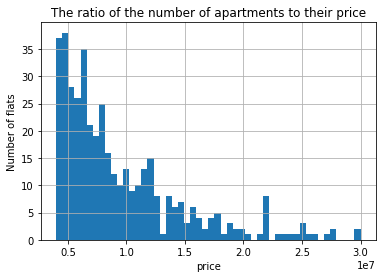

In [11]:
plt.xlabel('price')
plt.ylabel('Number of flats')
plt.title('The ratio of the number of apartments to their price')
good_data = good_data.query('4000000 <= last_price <= 30000000') # Remove too small and too large values
print(good_data['last_price'].quantile([0.25, 0.5, 0.75, 1])) #50% quantile == median
good_data['last_price'].hist(bins=50) # Build a gitogram
print(data['last_price'].max()) # Max value


The average price of apartments is from 2 to 5 million (There are also quite large apartments up to 763 million)

100.0


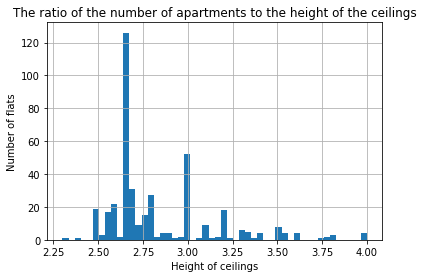

In [12]:
plt.xlabel('Height of ceilings')
plt.ylabel('Number of flats')
plt.title('The ratio of the number of apartments to the height of the ceilings')
good_data = good_data.query('2.3 <= ceiling_height <= 4') # Remove too small and too large values
good_data['ceiling_height'].quantile([0.25, 0.5, 0.75, 1]) #50% quantile == median
good_data['ceiling_height'].hist(bins=50) # Build a gitogram
print(data['ceiling_height'].max()) # Maximum value

***There are very anomalous spreads in this table. There are almost kilometer ceilings.
The most common ceiling heights are from 2.5 to 2.7 meters.***


<AxesSubplot:xlabel='total_area'>

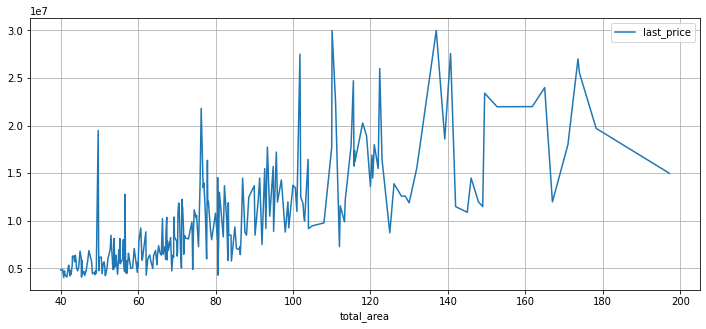

In [13]:
price_area_dependency = good_data[['last_price', 'total_area']] # take only the necessary columns from the dataframe
price_area_dependency.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5)) # plot of price versus area

***The price depends on the size of the apartment. The larger the area, the higher the price***

<AxesSubplot:xlabel='rooms'>

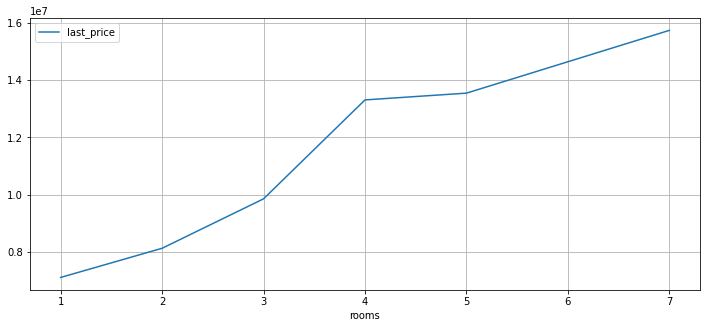

In [14]:
price_rooms_dependency = good_data[['last_price', 'rooms']] # take only the necessary columns from the dataframe
price_rooms_dependency.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) # plot of price versus number of rooms

***The most expensive apartments with 8 rooms and the price also strongly depends on the number of rooms***

<AxesSubplot:xlabel='cityCenters_nearest'>

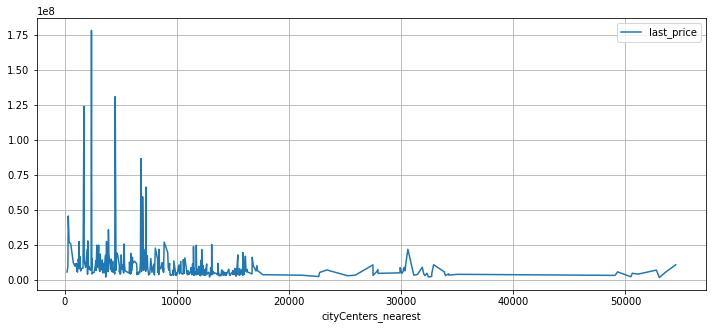

In [15]:
price_cityCenters_dependency = data[['last_price', 'cityCenters_nearest']] # take only necessary columns from the dataframe
price_cityCenters_dependency.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price dependence on distance from the center

***Remoteness from the center affects the price, but the farther away the price almost does not change***

<AxesSubplot:xlabel='apartment_floor'>

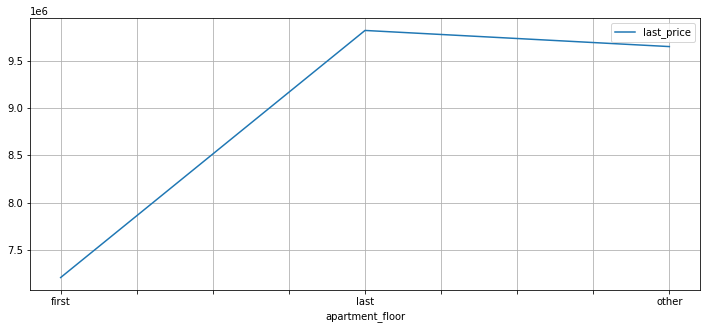

In [16]:
price_apartment_dependency = good_data[['last_price', 'apartment_floor']] # take only the necessary columns from the dataframe
price_apartment_dependency.pivot_table(index='apartment_floor', values='last_price').plot(grid=True, figsize=(12, 5)) # plot of price versus apartment floor

***The cheapest apartments are on the first floor, but on the top and the rest they cost about the same
(I think this is due to the bars on the windows and the noise).***

<AxesSubplot:xlabel='weekday'>

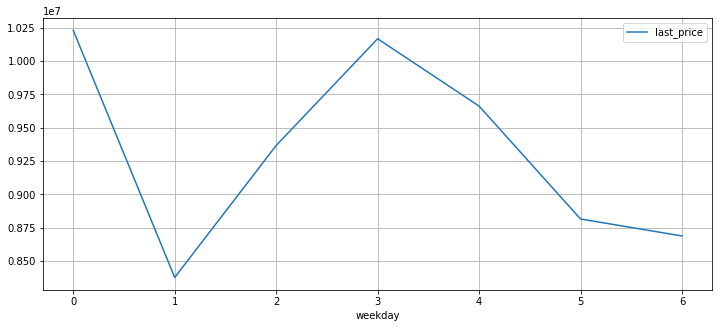

In [17]:
price_weekday_dependency = good_data[['last_price', 'weekday']] # take only the required columns from the dataframe
price_weekday_dependency.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price dependence on the day of the publishing week

***The most expensive apartments are put up for sale on weekdays.***

<AxesSubplot:xlabel='month'>

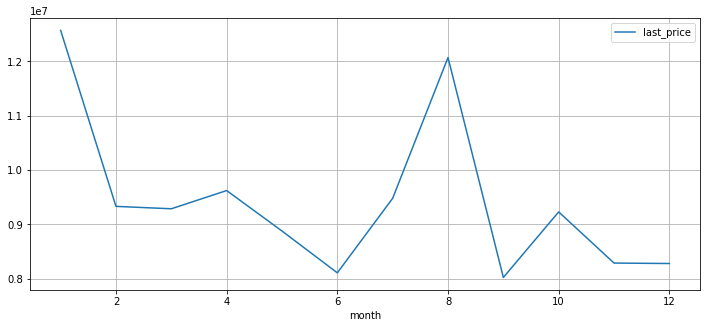

In [18]:
price_month_dependency = good_data[['last_price', 'month']] # take only the necessary columns from the dataframe
price_month_dependency.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price dependence on publication month

***The cheapest apartments are exhibited from the end of spring and the beginning of summer. The rest of the months are pretty much the same***

<AxesSubplot:xlabel='year'>

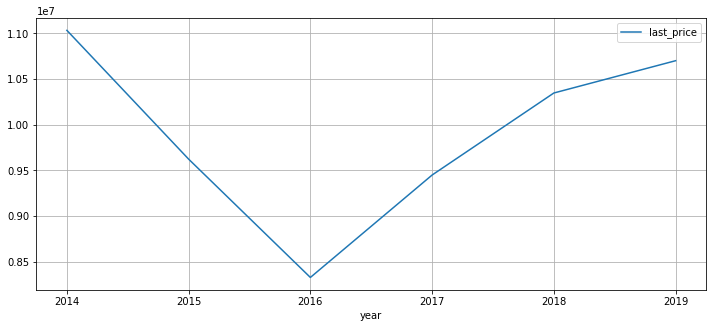

In [19]:
price_year_dependency = good_data[['last_price', 'year']] # take only the required columns from the dataframe
price_year_dependency.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5))

***Conclusion:***

- The price depends on the size of the apartment. The number of rooms also greatly affects the price,
- But strange as it may seem, apartments in the very center and on the outskirts of the central part of the city cost about the same.
- The cheapest apartments are on the first floor, but on the top floor and the rest they cost about the same (I think this is due to the bars on the windows and noise).
- The most expensive apartments are put up for sale on weekdays.
- The cheapest apartments are exhibited from the end of spring and the beginning of summer.
- The year of publication does not affect the price
- Housing prices fell from 2014 to 2015 and started to recover slightly from 2018 to 2019



Санкт-Петербург     381
Пушкин                9
Колпино               5
Петергоф              5
Кронштадт             3
Зеленогорск           3
посёлок Стрельна      2
Ломоносов             2
Павловск              1
Сестрорецк            1
Name: locality_name, dtype: int64


<AxesSubplot:xlabel='locality_name'>

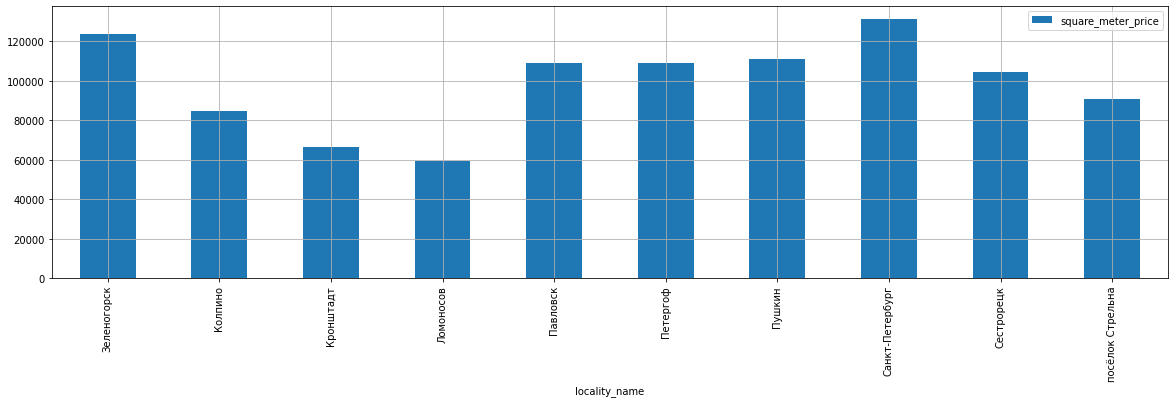

In [25]:
print(good_data['locality_name'].value_counts().head(10)) # Number of apartments in different cities
top_city = data.pivot_table(index="locality_name", values="square_meter_price", aggfunc=['mean','count']) # average value and number of apartments by city
top_city.columns = [ 'square_meter_price', 'count'] # column names
top_city = top_city.sort_values('count', ascending = False) # Descending order
top_city.pivot_table(index="locality_name", values= 'square_meter_price').plot(kind="bar", grid=True, figsize=(20, 5)) # average price plot for each city

***The most expensive city to live in is St. Petersburg, but the cheapest is Vyborg***

/tmp/ipykernel_461/440205020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piter['cityCenters_nearest_km'] = data_piter['cityCenters_nearest'] // 1000 # Make distance in kilometers


<AxesSubplot:xlabel='cityCenters_nearest_km'>

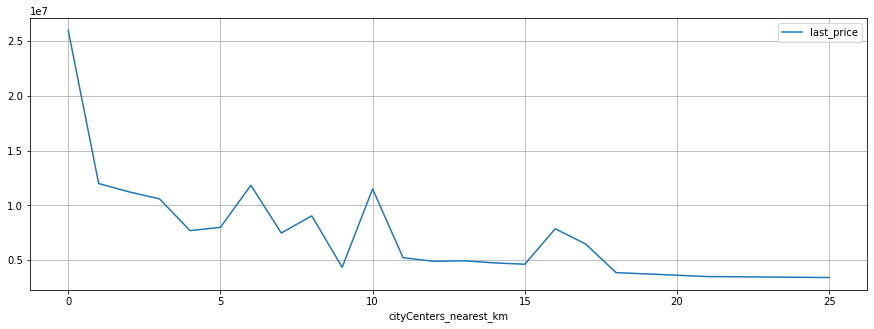

In [28]:
data_piter = data.query('locality_name in ("Санкт-Петербург")') # Only apartments in Pitira
data_piter['cityCenters_nearest_km'] = data_piter['cityCenters_nearest'] // 1000 # Make distance in kilometers
Center_km = data_piter.pivot_table(index="cityCenters_nearest_km", values="last_price", aggfunc=['median']) # looking for the median of the distance to the center
Center_km.pivot_table(index='cityCenters_nearest_km', values='median').plot(grid=True, figsize=(15, 5)) # graph of price versus distance from city center

***The central zone is located at a distance of 3-4 kilometers from the city center.***

/tmp/ipykernel_461/301224119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentr['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000 # Make the distance in kilometers


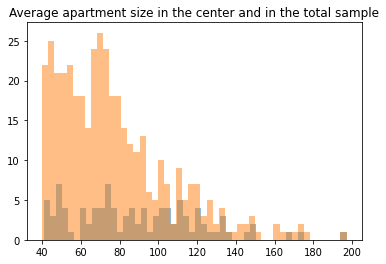

85.5
70.8


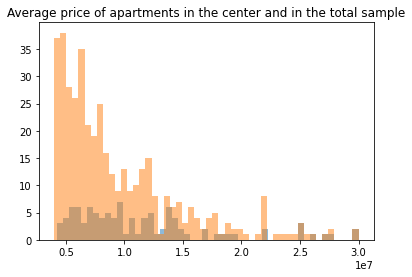

9850000.0
7695000.0


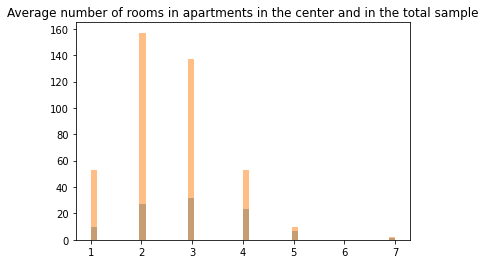

3.0
2.0


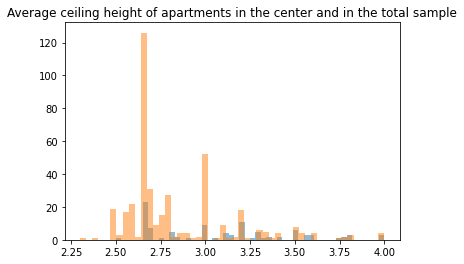

3.075
2.7


In [30]:
data_sentr = good_data.query('locality_name in ("Санкт-Петербург")') # Only apartments in Pitira
data_sentr['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000 # Make the distance in kilometers
data_sentr = data_sentr.query('cityCenters_nearest_km <= 4') # Distance must not exceed 9 kilometers

plt.title('Average apartment size in the center and in the total sample')
x = data_sentr['total_area'] #center
y = good_data['total_area'] #Entire sample

plt.hist(x, bins = 50, alpha=0.5, label='Center')
plt.hist(y, bins = 50, alpha=0.5, label='All selection')
plt.show()
print(data_sentr['total_area'].median()) # Median center
print(good_data['total_area'].median()) # Median of all apartments


plt.title('Average price of apartments in the center and in the total sample')
x = data_sentr['last_price'] #center
y = good_data['last_price'] #Full selection

plt.hist(x, bins = 50, alpha=0.5, label='Center')
plt.hist(y, bins = 50, alpha=0.5, label='All selection')
plt.show()
print(data_sentr['last_price'].median()) # Median center
print(good_data['last_price'].median()) # Median of all apartments


plt.title('Average number of rooms in apartments in the center and in the total sample')
x = data_sentr['rooms'] #center
y = good_data['rooms'] #Entire selection

plt.hist(x, bins = 50, alpha=0.5, label='Center')
plt.hist(y, bins = 50, alpha=0.5, label='All selection')
plt.show()
print(data_sentr['rooms'].median()) # Median center
print(good_data['rooms'].median()) # Median of all apartments


plt.title('Average ceiling height of apartments in the center and in the total sample')
x = data_sentr['ceiling_height'] #center
y = good_data['ceiling_height'] #Entire sample

plt.hist(x, bins = 50, alpha=0.5, label='Center')
plt.hist(y, bins = 50, alpha=0.5, label='All selection')
plt.show()
print(data_sentr['ceiling_height'].median()) # Median center
print(good_data['ceiling_height'].median()) # Median of all apartments

***Histograms are similar, but flats in the center are slightly better in everything. Except price***

Text(0.5, 1.0, 'Area to Price Ratio')

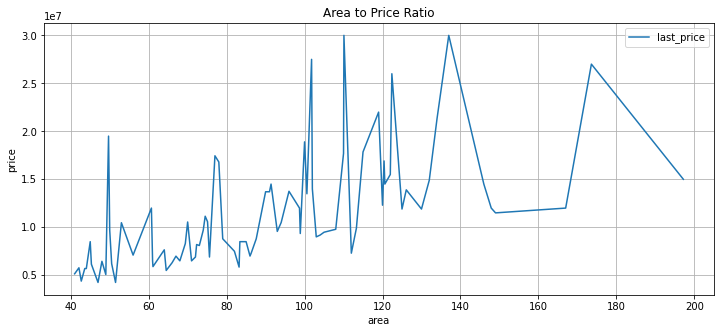

In [31]:
data_sentr.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5))#plot price versus area
plt.xlabel('area')
plt.ylabel('price')
plt.title('Area to Price Ratio')

Text(0.5, 1.0, 'Room to Price Ratio')

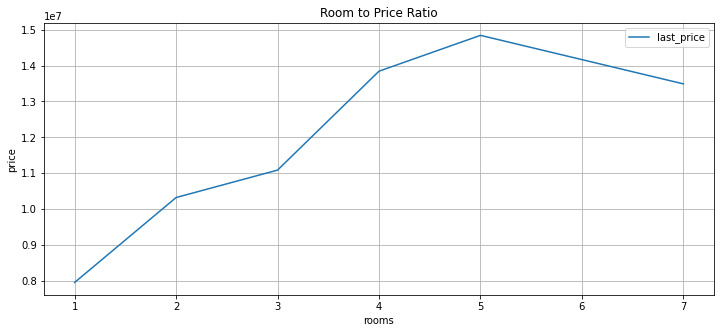

In [32]:
data_sentr.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price versus number of rooms
plt.xlabel('rooms')
plt.ylabel('price')
plt.title('Room to Price Ratio')

Text(0.5, 1.0, 'Ratio of Distance to Center to Price')

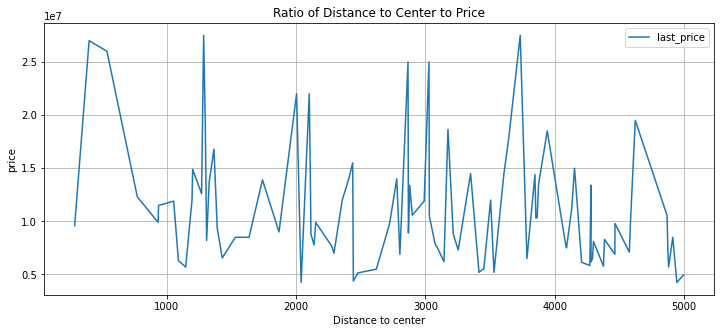

In [33]:
data_sentr.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price versus distance from center
plt.xlabel('Distance to center')
plt.ylabel('price')
plt.title('Ratio of Distance to Center to Price')

Text(0.5, 1.0, 'Floor to price ratio')

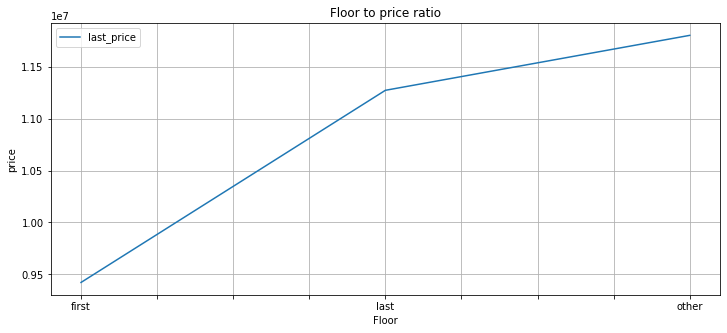

In [34]:
data_sentr.pivot_table(index='apartment_floor', values='last_price').plot(grid=True, figsize=(12, 5)) # plot of price versus floor
plt.xlabel('Floor')
plt.ylabel('price')
plt.title('Floor to price ratio')

Text(0.5, 1.0, 'Ratio of the day of the week to the price')

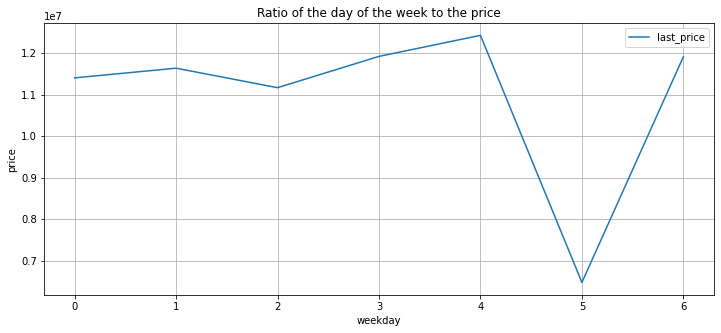

In [35]:
data_sentr.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of the price depending on the day of the week it was sold
plt.xlabel('weekday')
plt.ylabel('price')
plt.title('Ratio of the day of the week to the price')

Text(0.5, 1.0, 'Ratio of month to price')

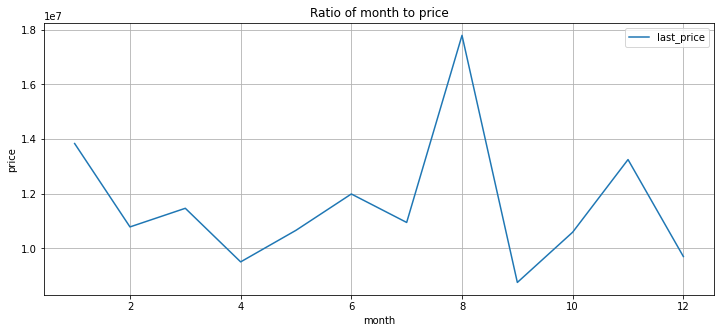

In [36]:
data_sentr.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price versus month it was sold
plt.xlabel('month')
plt.ylabel('price')
plt.title('Ratio of month to price')

Text(0.5, 1.0, 'Year to Price Ratio')

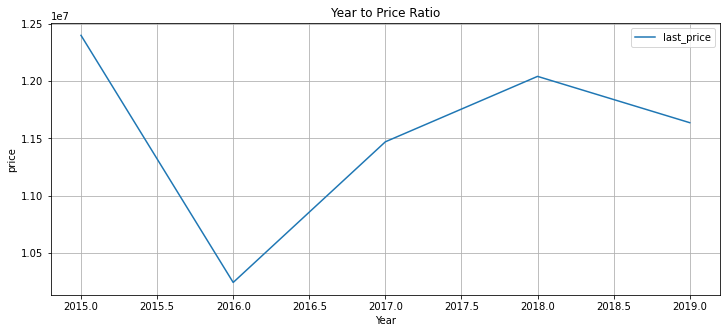

In [37]:
data_sentr.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5)) # graph of price versus year it was sold
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Year to Price Ratio')

- Residents of the center sell cheaper properties on weekends
- Also, the cheapest apartments are sold not only at the end of spring, but also in the winter before the new year
- You can clearly see that the farther from the center the cheaper.

### Step 5. General conclusion

***Everything affects the price of an apartment. From the distance to the center, to the number of rooms.***
- The most important parameters are the number of rooms and the area of the apartment.
- The cheapest apartments are on the first floor
- Apartments in the center are more expensive and smaller in size.
- The most expensive apartments in St. Petersburg, but the cheapest in Vyborg
